In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib notebook

In [25]:
data = pd.read_csv("owid-covid-data.csv")

In [26]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84964 entries, 0 to 84963
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               84964 non-null  object 
 1   continent                              80862 non-null  object 
 2   location                               84964 non-null  object 
 3   date                                   84964 non-null  object 
 4   total_cases                            82873 non-null  float64
 5   new_cases                              82871 non-null  float64
 6   new_cases_smoothed                     81870 non-null  float64
 7   total_deaths                           73217 non-null  float64
 8   new_deaths                             73375 non-null  float64
 9   new_deaths_smoothed                    81870 non-null  float64
 10  total_cases_per_million                82425 non-null  float64
 11  ne

In [28]:
len(data.index)

84964

In [29]:
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fij

In [30]:
death_data = data[['iso_code', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 
                   'total_cases_per_million', 'total_deaths_per_million',
                   'new_cases_per_million', 'new_deaths_per_million']]

In [31]:
death_data.fillna(0, inplace = True)

C:\Users\vaibh\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
death_total_data = death_data.groupby(['location'])[['total_cases', 'total_deaths', 
                                                                'total_cases_per_million', 'total_deaths_per_million']].max()

In [33]:
death_total_data = death_total_data.loc[['India','United States','Brazil','World']]

<IPython.core.display.Javascript object>


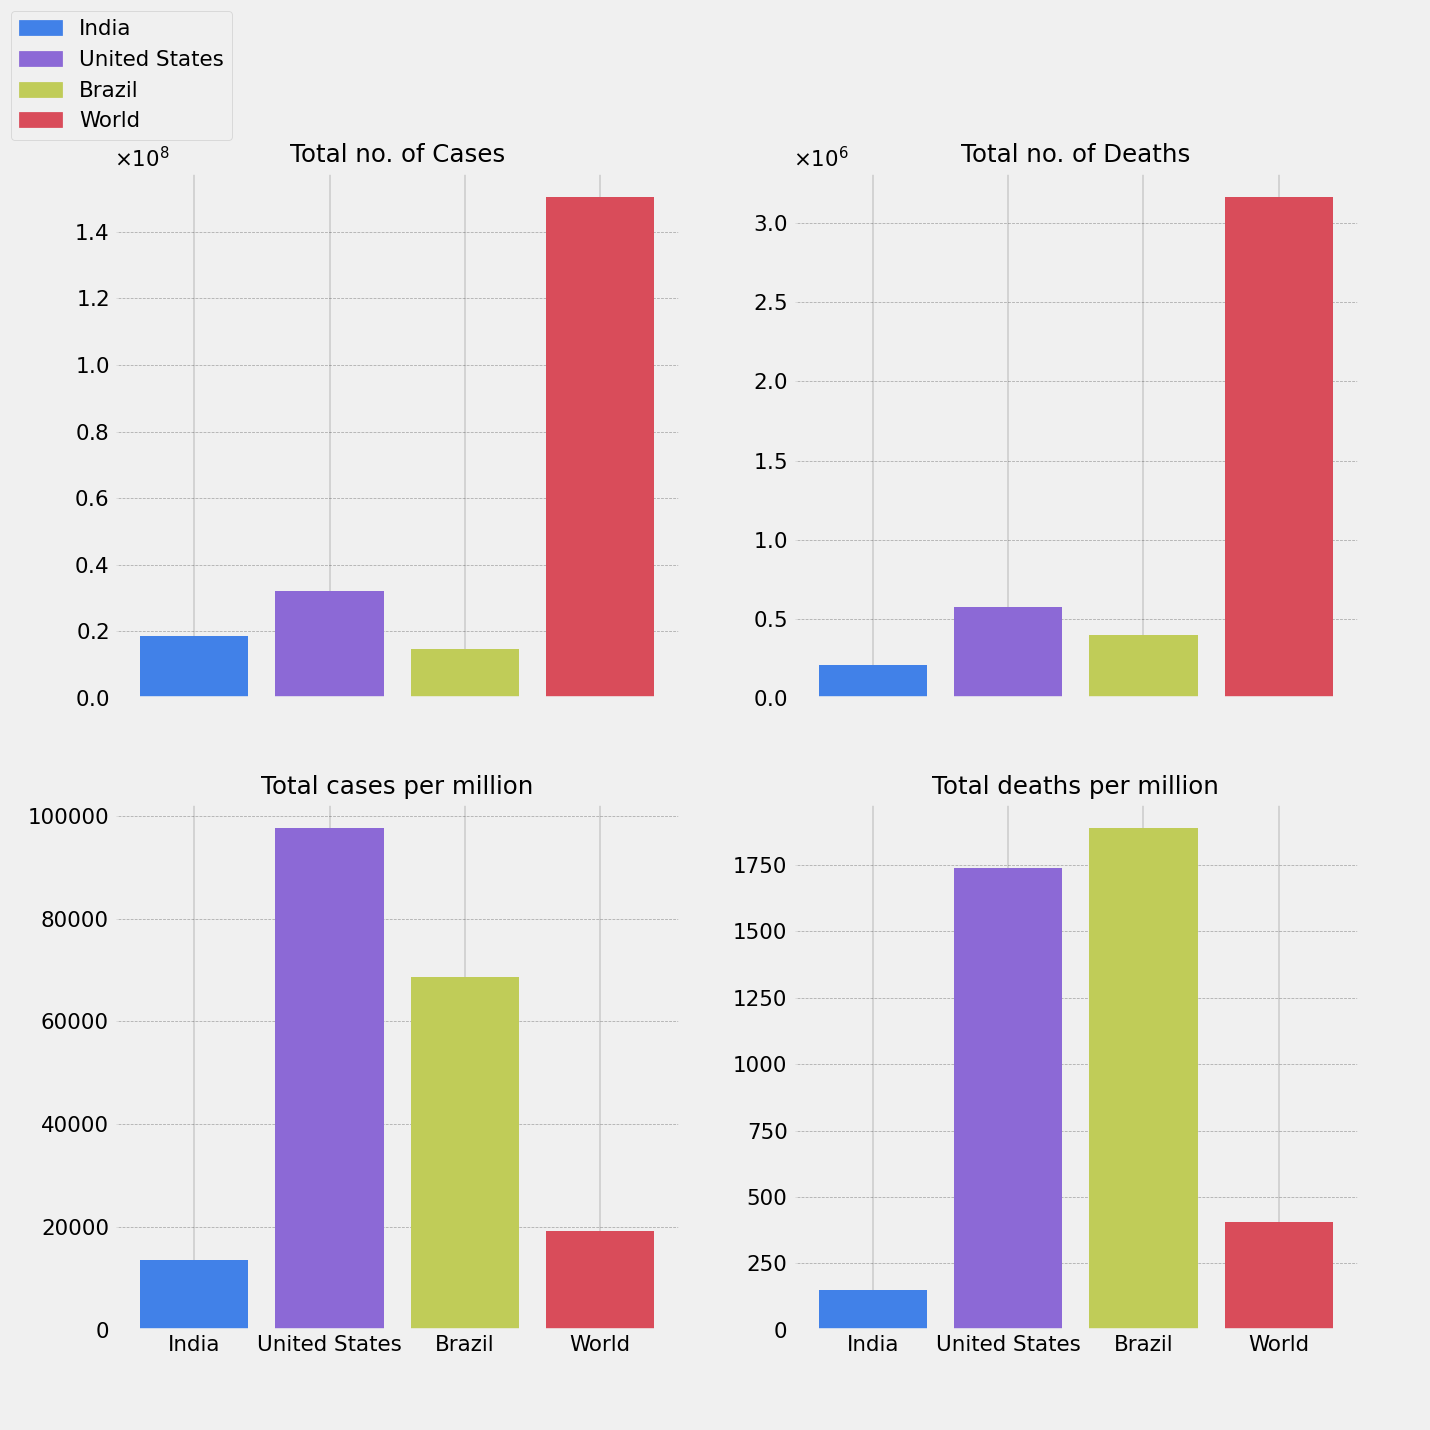

In [34]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex = True)

fig.set_figheight(13)
fig.set_figwidth(13)

#colors = ['#4181e8', '#8c69d6', '#c0cc58', '#d94c5a']

colors = {'India':'#4181e8', 'United States':'#8c69d6', 'Brazil' : '#c0cc58', 'World' : '#d94c5a'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


plt.ticklabel_format(axis = 'y', style = 'sci', useOffset = False)

ax1.bar(list(death_total_data.index),death_total_data['total_cases'], 
        color = list(colors.values()))

ax1.set_title("Total no. of Cases", fontsize = 16)
ax1.grid(True, 'major', 'y', ls='--', lw=0.5, c='k', alpha=0.3)
ax1.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText = True, useOffset = False))

ax2.bar(list(death_total_data.index),death_total_data['total_deaths'], 
        color = list(colors.values()))
ax2.set_title("Total no. of Deaths", fontsize = 16)
ax2.grid(True, 'major', 'y', ls='--', lw=0.5, c='k', alpha=0.3)
ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText = True, useOffset = False))

ax3.bar(list(death_total_data.index),death_total_data['total_cases_per_million'], 
        color = list(colors.values()))
ax3.set_title("Total cases per million", fontsize = 16)
ax3.grid(True, 'major', 'y', ls='--', lw=0.5, c='k', alpha=0.3)

ax4.bar(list(death_total_data.index),death_total_data['total_deaths_per_million'], 
        color = list(colors.values()))
ax4.set_title("Total deaths per million", fontsize = 16)
ax4.grid(True, 'major', 'y', ls='--', lw=0.5, c='k', alpha=0.3)

fig.legend(handles, labels, loc = "upper left")

In [35]:
fig.savefig('cov.png')

## New cases per million plot

In [36]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [37]:
#top_countries = list(data[data['date'] == '2021-04-29'].sort_values('new_cases_per_million', ascending = False)['location'].head(1))
top_countries = []

In [38]:
top_countries.append('United States')
top_countries.append('Brazil')
top_countries.append('India')
top_countries.append('World')

In [39]:
top_countries

['United States', 'Brazil', 'India', 'World']

In [40]:
top_new_df = data[data['location'].isin(top_countries)][['location','date','new_cases_per_million']]
top_new_df['date'] = top_new_df['date'].apply(pd.to_datetime)

top_new_df.head()


,location,date,new_cases_per_million
10898,Brazil,2020-02-26,0.005
10899,Brazil,2020-02-27,0.000
10900,Brazil,2020-02-28,0.000
10901,Brazil,2020-02-29,0.005
10902,Brazil,2020-03-01,0.000


In [41]:
top_new_df = top_new_df.pivot('date','location','new_cases_per_million')
top_new_df.head()


location,Brazil,India,United States,World
date,,,,
2020-01-22,NaN,NaN,NaN,0.000
2020-01-23,NaN,NaN,0.000,0.013
2020-01-24,NaN,NaN,0.003,0.037
2020-01-25,NaN,NaN,0.000,0.063
2020-01-26,NaN,NaN,0.009,0.088


In [42]:
type(top_new_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [43]:
top_new_df.fillna(0, inplace = True)
top_new_df.head(10)

location,Brazil,India,United States,World
date,,,,
2020-01-22,0.0,0.000,0.000,0.000
2020-01-23,0.0,0.000,0.000,0.013
2020-01-24,0.0,0.000,0.003,0.037
2020-01-25,0.0,0.000,0.000,0.063
2020-01-26,0.0,0.000,0.009,0.088
2020-01-27,0.0,0.000,0.000,0.104
2020-01-28,0.0,0.000,0.000,0.340
2020-01-29,0.0,0.000,0.003,0.076
2020-01-30,0.0,0.001,0.000,0.265


In [44]:
top_new_df = top_new_df.loc[top_new_df.index >= '2021-01-01']
top_new_df.head()


location,Brazil,India,United States,World
date,,,,
2021-01-01,115.756,14.518,464.129,68.381
2021-01-02,74.459,26.997,907.274,80.356
2021-01-03,81.582,11.959,630.648,68.353
2021-01-04,94.120,11.866,556.739,71.088
2021-01-05,266.504,13.107,710.299,94.951


<IPython.core.display.Javascript object>


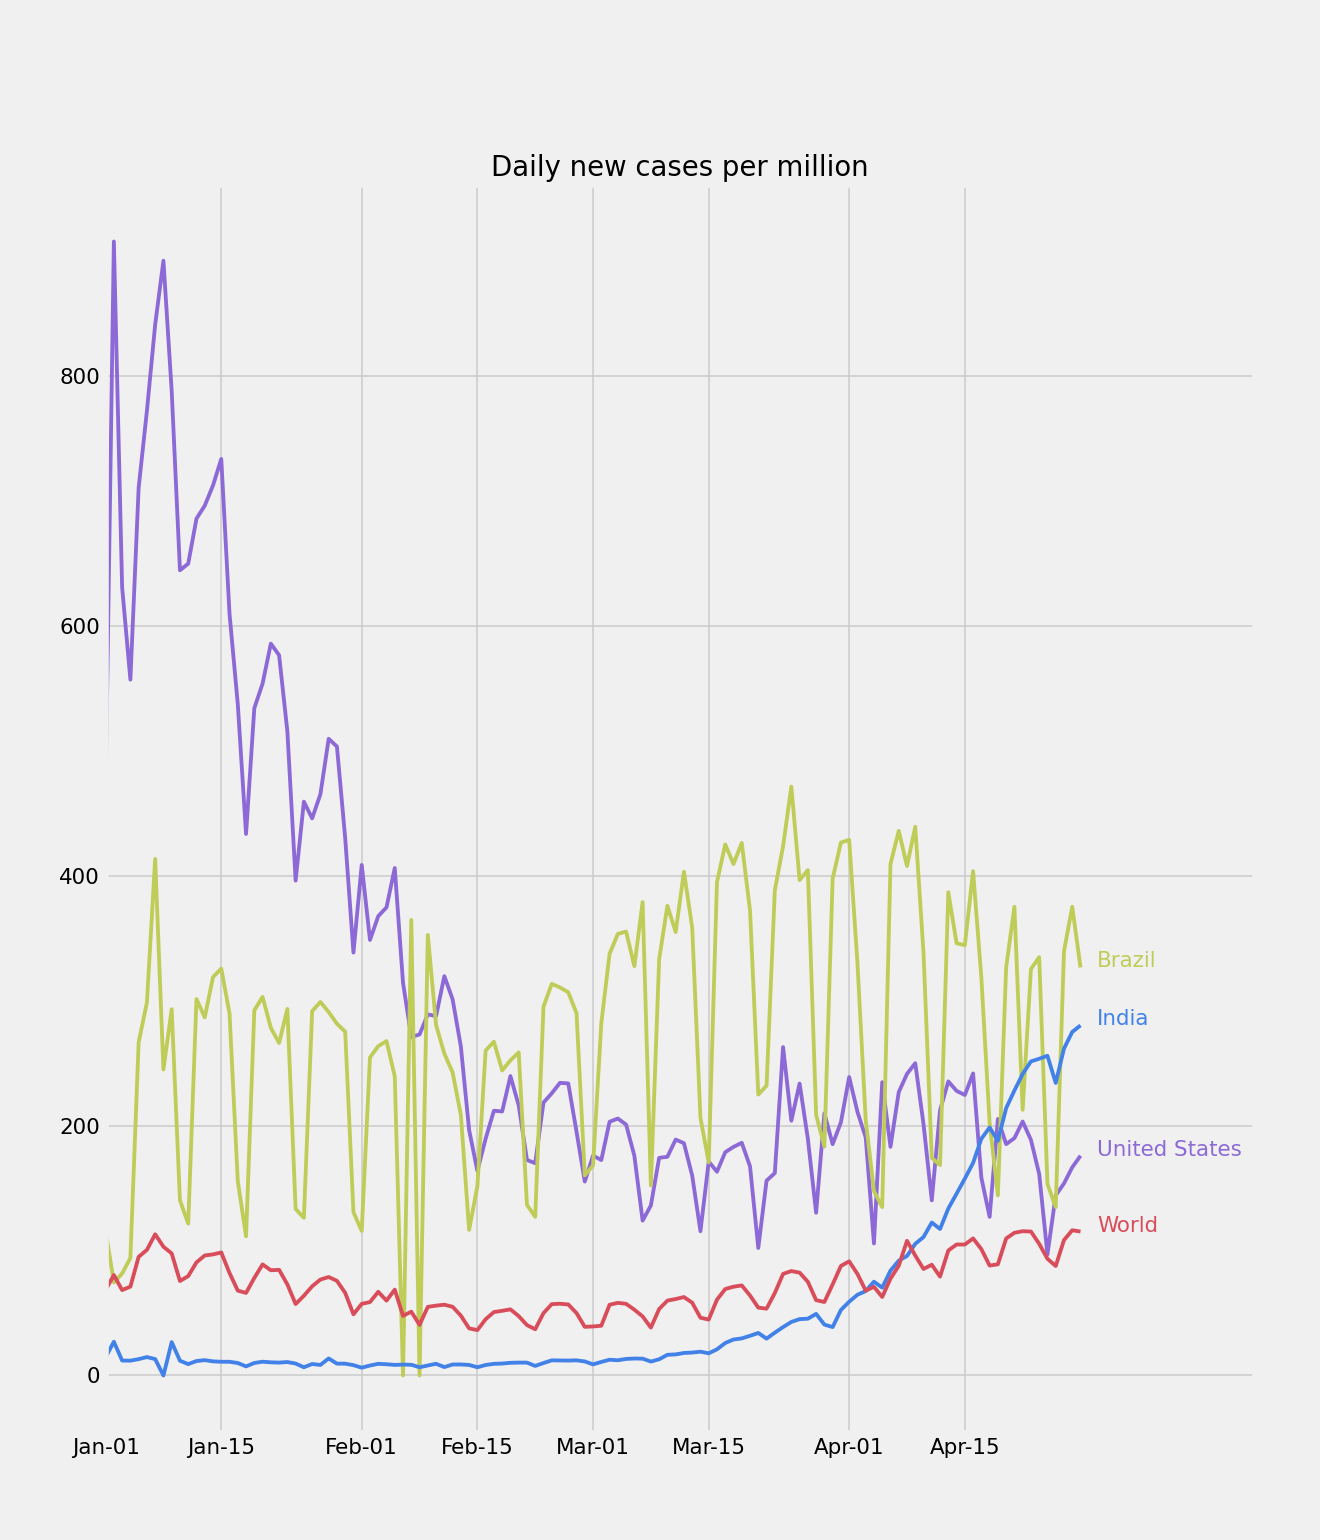

Text(0.5, 1.0, 'Daily new cases per million')

In [45]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1,1,figsize = (12,14))

ax.set_xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-05-20'))

ax.set_xticks(pd.to_datetime(['2021-01-01','2021-01-15','2021-02-01','2021-02-15',
               '2021-03-01','2021-03-15','2021-04-01','2021-04-15']))
colors = {'India':'#4181e8', 'United States':'#8c69d6', 'Brazil' : '#c0cc58', 'World' : '#d94c5a'}

for column in top_countries:

    line, = ax.plot(column, data=top_new_df,
                    lw=2.5, color = colors[column])
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    
    ax.text(pd.to_datetime('2021-05-01'),y, column, fontsize = 14, color = line.get_color())
    
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_title("Daily new cases per million", fontsize = 18)

In [46]:
plt.savefig("trend.png")